In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
!pip install sentence_transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 66.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 76.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 105.5 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125942 sha256=960e36488954cabf8e5ba4ad0065f8808e9c37732f197e9ce8a9c5d65c55ef4d
  Stored in directory: /root/.cache/pip/wheels/71/67/06/162a3760c40d74dd40bc855d527008d26341c2b0ecf3e8e11f
Successfully built sentence_transformers


In [3]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 16.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993243 sha256=3a18b78a051d273d56d2e9467b9b8431413e3c383c067fcfd9a2e4c8931c4b61
  Stored in directory: /root/.cache/pip/wheels/d1/c1/d9/7e068de779d863bc8f8fc9467d85e25cfe47fa5051fff1a1bb
Successfully built langdetect


In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
import torch
from langdetect import detect

In [5]:
os.chdir("/content/drive/My Drive/IRProject")

In [6]:
# Read the csv file
df = pd.read_csv('covid_df_20000.csv')
df

,Unnamed: 0,doc_id,title,abstract,text_body
0,1,5ac635d21fdb1726f21d7090a233dd2b5ffdc1b5,"Long Term Predictors of Breathlessness, Exerci...",J o u r n a l P r e -p r o o f 2,With over 246 million Coronavirus disease 2019...
1,2,71d93a6452061c57ae1532991d4a20cd6fc6fcb3,Emergence of universality in the transmission ...,The complexities involved in modelling the tra...,• Even though the pattern of disease spread is...
2,3,635ba7eca764f7caaa82904197c40a20111ec940,Supporting families to protect child health: P...,Supportive parenting is critical for promoting...,a1111111111 a1111111111 a1111111111 a111111111...
3,4,0282d2f9eb65318e40db21efbe6172ce16c8acf5,Perspectives on the Early Quality of Evidence ...,Background: The severe acute respiratory syndr...,The severe acute respiratory syndrome coronavi...
4,5,d96113a2d8691d3b1aee5fd1b5d30241f2b2a633,Quantify the role of superspreaders -opinion l...,Effective communication of accurate informatio...,We design a mathematical model to quantify the...
...,...,...,...,...,...
19995,19996,ffdc50d239f8e531dc159993723c0cbc176a632e,Comparative analysis of antibody-and lipid-bas...,Multiplexing of samples in single-cell RNA-seq...,Recent advances in single-cell and single-nucl...
19996,19997,b37bf3ab1d814f853a42cd8958d7390b42343bd2,NaN,NaN,To the Editor:\n We read with interest the art...
19997,19998,2c70b8caf708c5c1b0c9b811a80179061274cff7,Nervensystem,NaN,zeichen diagnostisch eine Rolle spielen. Am Ko...
19998,19999,1831d9c801bcbc3388eb2aeb7d48aed3c2c690e9,Journal Pre-proof The sub-specialty of Foot an...,NaN,The sub-specialty of Foot and Ankle is evolvin...


In [7]:
# Drop the first column of the dataframe
df.drop(df.columns[[0]], axis=1, inplace=True)
df

,doc_id,title,abstract,text_body
0,5ac635d21fdb1726f21d7090a233dd2b5ffdc1b5,"Long Term Predictors of Breathlessness, Exerci...",J o u r n a l P r e -p r o o f 2,With over 246 million Coronavirus disease 2019...
1,71d93a6452061c57ae1532991d4a20cd6fc6fcb3,Emergence of universality in the transmission ...,The complexities involved in modelling the tra...,• Even though the pattern of disease spread is...
2,635ba7eca764f7caaa82904197c40a20111ec940,Supporting families to protect child health: P...,Supportive parenting is critical for promoting...,a1111111111 a1111111111 a1111111111 a111111111...
3,0282d2f9eb65318e40db21efbe6172ce16c8acf5,Perspectives on the Early Quality of Evidence ...,Background: The severe acute respiratory syndr...,The severe acute respiratory syndrome coronavi...
4,d96113a2d8691d3b1aee5fd1b5d30241f2b2a633,Quantify the role of superspreaders -opinion l...,Effective communication of accurate informatio...,We design a mathematical model to quantify the...
...,...,...,...,...
19995,ffdc50d239f8e531dc159993723c0cbc176a632e,Comparative analysis of antibody-and lipid-bas...,Multiplexing of samples in single-cell RNA-seq...,Recent advances in single-cell and single-nucl...
19996,b37bf3ab1d814f853a42cd8958d7390b42343bd2,NaN,NaN,To the Editor:\n We read with interest the art...
19997,2c70b8caf708c5c1b0c9b811a80179061274cff7,Nervensystem,NaN,zeichen diagnostisch eine Rolle spielen. Am Ko...
19998,1831d9c801bcbc3388eb2aeb7d48aed3c2c690e9,Journal Pre-proof The sub-specialty of Foot an...,NaN,The sub-specialty of Foot and Ankle is evolvin...


In [8]:
# Drop rows with NaN values in the 'text_body' and 'abstract' columns
df = df.dropna(subset=['text_body', 'abstract'])
df

,doc_id,title,abstract,text_body
0,5ac635d21fdb1726f21d7090a233dd2b5ffdc1b5,"Long Term Predictors of Breathlessness, Exerci...",J o u r n a l P r e -p r o o f 2,With over 246 million Coronavirus disease 2019...
1,71d93a6452061c57ae1532991d4a20cd6fc6fcb3,Emergence of universality in the transmission ...,The complexities involved in modelling the tra...,• Even though the pattern of disease spread is...
2,635ba7eca764f7caaa82904197c40a20111ec940,Supporting families to protect child health: P...,Supportive parenting is critical for promoting...,a1111111111 a1111111111 a1111111111 a111111111...
3,0282d2f9eb65318e40db21efbe6172ce16c8acf5,Perspectives on the Early Quality of Evidence ...,Background: The severe acute respiratory syndr...,The severe acute respiratory syndrome coronavi...
4,d96113a2d8691d3b1aee5fd1b5d30241f2b2a633,Quantify the role of superspreaders -opinion l...,Effective communication of accurate informatio...,We design a mathematical model to quantify the...
...,...,...,...,...
19991,1f71320e3751e0a4a7a4044ab35f0df95647bd34,Conservative Approach for Treatment of Isolate...,Background The ongoing COVID 19 pandemic broug...,Mandibular fractures are most often treated by...
19993,0dd0af835ffe41c88c18aefb060ac7c34e0bb6bb,Online Book Shopping in Indonesian During the ...,The COVID-19 pandemic has lead to the implemen...,The COVID-19 pandemic is still not over around...
19994,14e0640de2acb0f23458227db0d2f1a71c885a4b,Archives of Sexual Behavior Primary Health Pro...,There is a desire and need among minor-attract...,There is a growing body of research seeking to...
19995,ffdc50d239f8e531dc159993723c0cbc176a632e,Comparative analysis of antibody-and lipid-bas...,Multiplexing of samples in single-cell RNA-seq...,Recent advances in single-cell and single-nucl...


In [9]:
# Replace cells with NaN values in the 'title' column with ''. We maintain these rows as documents' contents are a priority.
print("The number of NaNs in the title column is: ",  df['title'].isna().sum())
df['title'] = df['title'].fillna('')
df

The number of NaNs in the title column is:  687


<ipython-input-9-78e3d4fb7465>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['title'] = df['title'].fillna('')


,doc_id,title,abstract,text_body
0,5ac635d21fdb1726f21d7090a233dd2b5ffdc1b5,"Long Term Predictors of Breathlessness, Exerci...",J o u r n a l P r e -p r o o f 2,With over 246 million Coronavirus disease 2019...
1,71d93a6452061c57ae1532991d4a20cd6fc6fcb3,Emergence of universality in the transmission ...,The complexities involved in modelling the tra...,• Even though the pattern of disease spread is...
2,635ba7eca764f7caaa82904197c40a20111ec940,Supporting families to protect child health: P...,Supportive parenting is critical for promoting...,a1111111111 a1111111111 a1111111111 a111111111...
3,0282d2f9eb65318e40db21efbe6172ce16c8acf5,Perspectives on the Early Quality of Evidence ...,Background: The severe acute respiratory syndr...,The severe acute respiratory syndrome coronavi...
4,d96113a2d8691d3b1aee5fd1b5d30241f2b2a633,Quantify the role of superspreaders -opinion l...,Effective communication of accurate informatio...,We design a mathematical model to quantify the...
...,...,...,...,...
19991,1f71320e3751e0a4a7a4044ab35f0df95647bd34,Conservative Approach for Treatment of Isolate...,Background The ongoing COVID 19 pandemic broug...,Mandibular fractures are most often treated by...
19993,0dd0af835ffe41c88c18aefb060ac7c34e0bb6bb,Online Book Shopping in Indonesian During the ...,The COVID-19 pandemic has lead to the implemen...,The COVID-19 pandemic is still not over around...
19994,14e0640de2acb0f23458227db0d2f1a71c885a4b,Archives of Sexual Behavior Primary Health Pro...,There is a desire and need among minor-attract...,There is a growing body of research seeking to...
19995,ffdc50d239f8e531dc159993723c0cbc176a632e,Comparative analysis of antibody-and lipid-bas...,Multiplexing of samples in single-cell RNA-seq...,Recent advances in single-cell and single-nucl...


In [10]:
# Function to detect the language of the text
def detect_language(text):
    try:
        return detect(text)
    except:
        return None

# Remove non-English rows
df['language'] = df['text_body'].apply(detect_language)
df = df[df['language'] == 'en']
df

<ipython-input-10-b063df0b0133>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['language'] = df['text_body'].apply(detect_language)


,doc_id,title,abstract,text_body,language
0,5ac635d21fdb1726f21d7090a233dd2b5ffdc1b5,"Long Term Predictors of Breathlessness, Exerci...",J o u r n a l P r e -p r o o f 2,With over 246 million Coronavirus disease 2019...,en
1,71d93a6452061c57ae1532991d4a20cd6fc6fcb3,Emergence of universality in the transmission ...,The complexities involved in modelling the tra...,• Even though the pattern of disease spread is...,en
2,635ba7eca764f7caaa82904197c40a20111ec940,Supporting families to protect child health: P...,Supportive parenting is critical for promoting...,a1111111111 a1111111111 a1111111111 a111111111...,en
3,0282d2f9eb65318e40db21efbe6172ce16c8acf5,Perspectives on the Early Quality of Evidence ...,Background: The severe acute respiratory syndr...,The severe acute respiratory syndrome coronavi...,en
4,d96113a2d8691d3b1aee5fd1b5d30241f2b2a633,Quantify the role of superspreaders -opinion l...,Effective communication of accurate informatio...,We design a mathematical model to quantify the...,en
...,...,...,...,...,...
19990,1f0587d0bf239fead9cf242b73ed0a2f2b753874,"Germaphobia! Does our Relationship with, and K...",Germaphobia --a pathological aversion to micro...,Germaphobia -also known as 'mysophobia' -is th...,en
19991,1f71320e3751e0a4a7a4044ab35f0df95647bd34,Conservative Approach for Treatment of Isolate...,Background The ongoing COVID 19 pandemic broug...,Mandibular fractures are most often treated by...,en
19993,0dd0af835ffe41c88c18aefb060ac7c34e0bb6bb,Online Book Shopping in Indonesian During the ...,The COVID-19 pandemic has lead to the implemen...,The COVID-19 pandemic is still not over around...,en
19994,14e0640de2acb0f23458227db0d2f1a71c885a4b,Archives of Sexual Behavior Primary Health Pro...,There is a desire and need among minor-attract...,There is a growing body of research seeking to...,en


In [11]:
# Concatenate the title and abstract columns to form a new column called 'title_body'
df['title_body'] = df['title'] + ' ' + df['text_body']
df

<ipython-input-11-8751996c9cc9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['title_body'] = df['title'] + ' ' + df['text_body']


,doc_id,title,abstract,text_body,language,title_body
0,5ac635d21fdb1726f21d7090a233dd2b5ffdc1b5,"Long Term Predictors of Breathlessness, Exerci...",J o u r n a l P r e -p r o o f 2,With over 246 million Coronavirus disease 2019...,en,"Long Term Predictors of Breathlessness, Exerci..."
1,71d93a6452061c57ae1532991d4a20cd6fc6fcb3,Emergence of universality in the transmission ...,The complexities involved in modelling the tra...,• Even though the pattern of disease spread is...,en,Emergence of universality in the transmission ...
2,635ba7eca764f7caaa82904197c40a20111ec940,Supporting families to protect child health: P...,Supportive parenting is critical for promoting...,a1111111111 a1111111111 a1111111111 a111111111...,en,Supporting families to protect child health: P...
3,0282d2f9eb65318e40db21efbe6172ce16c8acf5,Perspectives on the Early Quality of Evidence ...,Background: The severe acute respiratory syndr...,The severe acute respiratory syndrome coronavi...,en,Perspectives on the Early Quality of Evidence ...
4,d96113a2d8691d3b1aee5fd1b5d30241f2b2a633,Quantify the role of superspreaders -opinion l...,Effective communication of accurate informatio...,We design a mathematical model to quantify the...,en,Quantify the role of superspreaders -opinion l...
...,...,...,...,...,...,...
19990,1f0587d0bf239fead9cf242b73ed0a2f2b753874,"Germaphobia! Does our Relationship with, and K...",Germaphobia --a pathological aversion to micro...,Germaphobia -also known as 'mysophobia' -is th...,en,"Germaphobia! Does our Relationship with, and K..."
19991,1f71320e3751e0a4a7a4044ab35f0df95647bd34,Conservative Approach for Treatment of Isolate...,Background The ongoing COVID 19 pandemic broug...,Mandibular fractures are most often treated by...,en,Conservative Approach for Treatment of Isolate...
19993,0dd0af835ffe41c88c18aefb060ac7c34e0bb6bb,Online Book Shopping in Indonesian During the ...,The COVID-19 pandemic has lead to the implemen...,The COVID-19 pandemic is still not over around...,en,Online Book Shopping in Indonesian During the ...
19994,14e0640de2acb0f23458227db0d2f1a71c885a4b,Archives of Sexual Behavior Primary Health Pro...,There is a desire and need among minor-attract...,There is a growing body of research seeking to...,en,Archives of Sexual Behavior Primary Health Pro...


In [12]:
# Load a pre-trained BERT model
model = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')

# Generate sentence embeddings for each full text in the DataFrame
embeddings = model.encode(df['title_body'].tolist(), convert_to_tensor=True)

In [13]:
# Define a function for searching the DataFrame using a query string
def search(query, embeddings, top_n=10):
    # Encode the query string to generate a query embedding
    query_embedding = model.encode(query, convert_to_tensor=True)

    # Compute the cosine similarity between the query embedding and the embeddings of each full text
    cos_scores = torch.nn.functional.cosine_similarity(query_embedding, embeddings).cpu().numpy()

    # Get the indices of the top n scores in descending order
    top_indices = cos_scores.argsort()[-top_n:][::-1]

    # Return the DataFrame rows corresponding to the top n scores and the numpy array of the top n scores
    return df.iloc[top_indices]


**Query 1: 'transmission of virus in community'**

Please enter your query: transmission of virus in community

The scores array for the top ten results: [0.5301916  0.5026302  0.5010604  0.4876848  0.48037237 0.4755181
 0.46978724 0.4680222  0.46680704 0.46670043]

Top 10 results for the query 'transmission of virus in community':

Score: 0.5301916003227234
Title: Metabolites with SARS-CoV-2 Inhibitory Activity Identified from Human Microbiome Commensals
Body Text: that small molecules produced by human-associated bacteria can affect not only host cells but also coinhabiting organisms of the microbiome (5, 6) . While many studies have focused on identifying microbiota-encoded metabolites that affect either eukaryotic or prokaryotic cells, there are comparatively few examples of commensal metabolites that affect viral infection of host cells (7, 8) . Given that bacteria populate body sites that are frequently exposed to viruses, we sought to determine whether commensal bacteria encode metabolites that can inhibit SARS-CoV-2 infection.


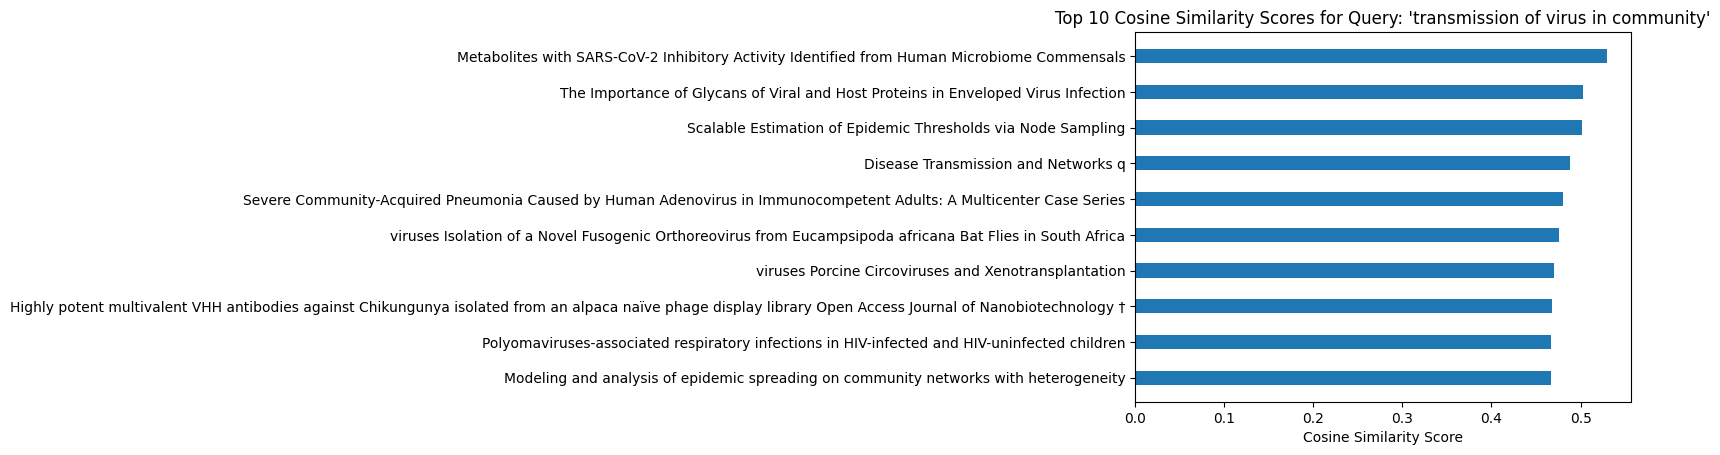

In [14]:
if __name__ == "__main__":
    # Prompt the user to enter a query string
    query = input("Please enter your query: ")
    
    # Set the number of top results to display
    top_n = 10
    
    # Call the search function to find the top results
    results = search(query, embeddings, top_n)

    # Sort the cosine similarity scores array in a descending order
    cos_scores = torch.nn.functional.cosine_similarity(model.encode(query, convert_to_tensor=True), embeddings).cpu().numpy()
    top_indices = cos_scores.argsort()[-top_n:][::-1]
    top_cos_scores =  cos_scores[top_indices]
    print(f"\nThe scores array for the top ten results: {top_cos_scores}")

    # Print the top results to the console
    print(f"\nTop {top_n} results for the query '{query}':")
    for (index, row), score in zip(results.iterrows(), top_cos_scores):
        print(f"\nScore: {score}")
        print(f"Title: {row['title']}\nBody Text: {row['text_body']}")

    # create Pandas dataframe from two lists
    df_scores = pd.DataFrame({"Titles":results['title'], "Scores":top_cos_scores})
    df_scores_sorted = df_scores.sort_values('Scores')
    df_scores_sorted = df_scores_sorted.astype({"Titles": str, "Scores": float})

    # Create a bar chart of the cosine similarity scores
    plt.barh("Titles", "Scores", data = df_scores_sorted, height = 0.4)
    plt.title(f"Top 10 Cosine Similarity Scores for Query: '{query}'")
    plt.xlabel("Cosine Similarity Score")
    plt.xticks() 
    plt.show()

**Query 2: 'range of incubation period'**

Please enter your query: range of incubation period

The scores array for the top ten results: [0.42164695 0.38528705 0.34374273 0.33538458 0.33534434 0.33454198
 0.33067626 0.33029956 0.32687587 0.32436186]

Top 10 results for the query 'range of incubation period':

Score: 0.42164695262908936
Title: 
Body Text: Dormancy, such as hibernation in mammals [1, 2] , diapause of insects and zooplankton [3] , as well as the soil seed banks [4, 5] , is a widespread and efficient adaptive strategy for populations under environmental fluctuation. Various types of dormancy are also a common form of stress response in bacteria including sporulation of Gram-positive bacteria [6] [7] [8] . The evolutionary stability of dormancy has been investigated under varying environments [3, 9, 10] , as well as under the environment with minimal abiotic fluctuations [3] . However, the dormant form of an organism is much more costly compared with the active form in the course of evolution, due to its inability 

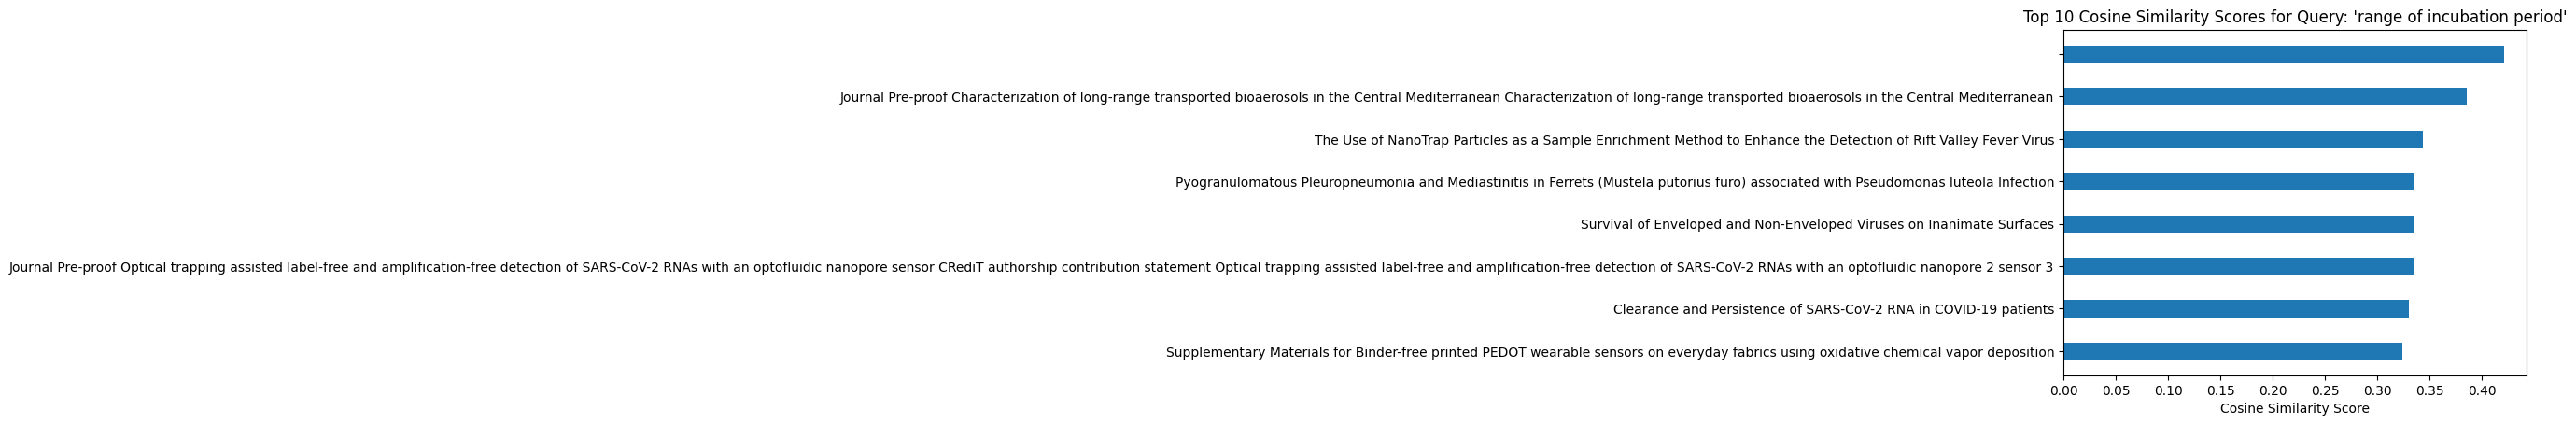

In [15]:
if __name__ == "__main__":
    # Prompt the user to enter a query string
    query = input("Please enter your query: ")
    
    # Set the number of top results to display
    top_n = 10
    
    # Call the search function to find the top results
    results = search(query, embeddings, top_n)

    # Sort the cosine similarity scores array in a descending order
    cos_scores = torch.nn.functional.cosine_similarity(model.encode(query, convert_to_tensor=True), embeddings).cpu().numpy()
    top_indices = cos_scores.argsort()[-top_n:][::-1]
    top_cos_scores =  cos_scores[top_indices]
    print(f"\nThe scores array for the top ten results: {top_cos_scores}")

    # Print the top results to the console
    print(f"\nTop {top_n} results for the query '{query}':")
    for (index, row), score in zip(results.iterrows(), top_cos_scores):
        print(f"\nScore: {score}")
        print(f"Title: {row['title']}\nBody Text: {row['text_body']}")

    # create Pandas dataframe from two lists
    df_scores = pd.DataFrame({"Titles":results['title'], "Scores":top_cos_scores})
    df_scores_sorted = df_scores.sort_values('Scores')
    df_scores_sorted = df_scores_sorted.astype({"Titles": str, "Scores": float})
    print(df_scores_sorted)
    df_scores_sorted = df_scores_sorted.drop([175, 11478])
    print(df_scores_sorted)

    # Create a bar chart of the cosine similarity scores

    plt.barh("Titles", "Scores", data = df_scores_sorted, height = 0.4)
    plt.title(f"Top 10 Cosine Similarity Scores for Query: '{query}'")
    plt.xlabel("Cosine Similarity Score")
    plt.xticks() 
    plt.show()

**Query 3: 'seasonal outbreaks'**

Please enter your query: seasonal outbreaks

The scores array for the top ten results: [0.39831212 0.39033532 0.3889764  0.36079124 0.36044127 0.35284856
 0.3491138  0.3486629  0.34791166 0.3454856 ]

Top 10 results for the query 'seasonal outbreaks':

Score: 0.39831212162971497
Title: Journal Pre-proofs Article Influenza's plummeting during the COVID-19 pandemic: The roles of mask- wearing, mobility change, and SARS-CoV-2 interference Influenza's Plummeting during the COVID-19 Pandemic: The Roles of Mask- Wearing, Mobility Change, and SARS-CoV-2 Interference Influenza Mask-wearing Mobility mitigation SARS-CoV-2 interference Non-pharmaceutical interventions
Body Text: Seasonal influenza viruses circulate year-round throughout the world, typically peaking in the winter in each hemisphere. However, since the first report of severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2) and non-pharmaceutical interventions (NPIs) to mitigate the virus, influenza activity has remained low, w

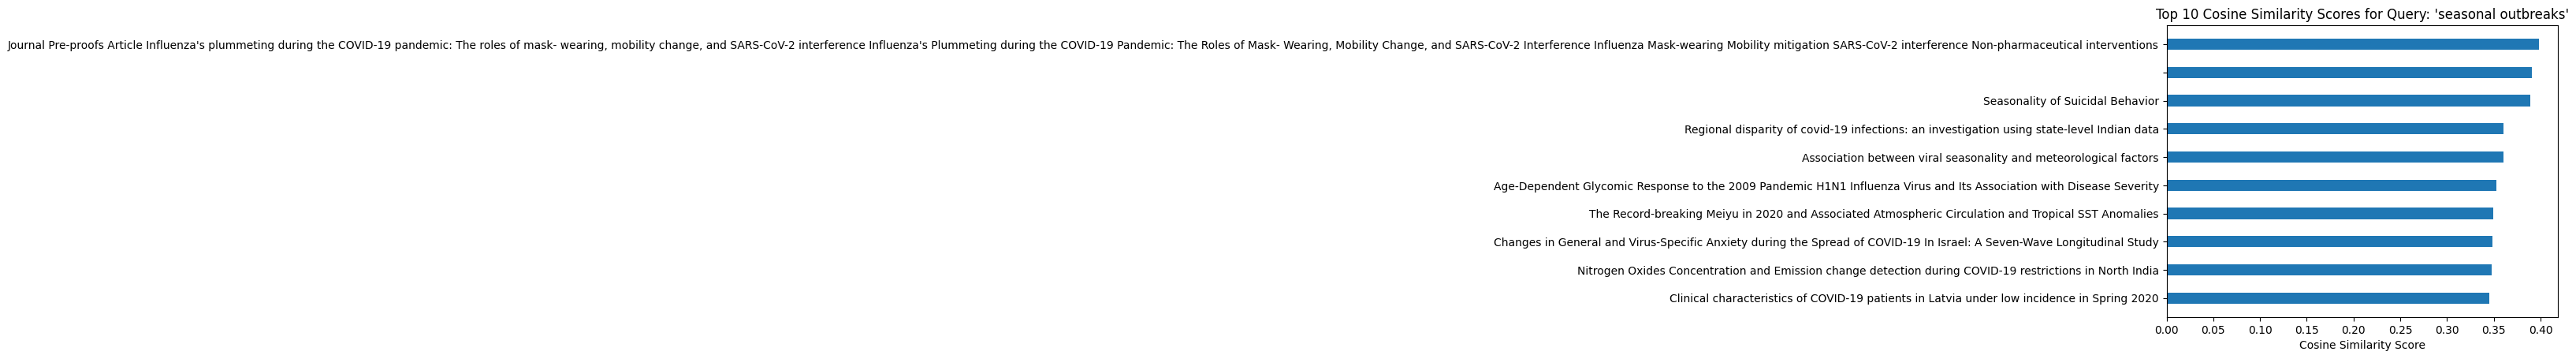

In [16]:
if __name__ == "__main__":
    # Prompt the user to enter a query string
    query = input("Please enter your query: ")
    
    # Set the number of top results to display
    top_n = 10
    
    # Call the search function to find the top results
    results = search(query, embeddings, top_n)

    # Sort the cosine similarity scores array in a descending order
    cos_scores = torch.nn.functional.cosine_similarity(model.encode(query, convert_to_tensor=True), embeddings).cpu().numpy()
    top_indices = cos_scores.argsort()[-top_n:][::-1]
    top_cos_scores =  cos_scores[top_indices]
    print(f"\nThe scores array for the top ten results: {top_cos_scores}")

    # Print the top results to the console
    print(f"\nTop {top_n} results for the query '{query}':")
    for (index, row), score in zip(results.iterrows(), top_cos_scores):
        print(f"\nScore: {score}")
        print(f"Title: {row['title']}\nBody Text: {row['text_body']}")

    # create Pandas dataframe from two lists
    df_scores = pd.DataFrame({"Titles":results['title'], "Scores":top_cos_scores})
    df_scores_sorted = df_scores.sort_values('Scores')
    df_scores_sorted = df_scores_sorted.astype({"Titles": str, "Scores": float})

    # Create a bar chart of the cosine similarity scores
    plt.barh("Titles", "Scores", data = df_scores_sorted, height = 0.4)
    plt.title(f"Top 10 Cosine Similarity Scores for Query: '{query}'")
    plt.xlabel("Cosine Similarity Score")
    plt.xticks() 
    plt.show()

**Query 4: 'effect of environment factors on virus'**

Please enter your query: effect of environment factors on virus

The scores array for the top ten results: [0.5586703  0.5410301  0.53954256 0.5358087  0.53560394 0.5321393
 0.53011537 0.5230944  0.5193752  0.51560813]

Top 10 results for the query 'effect of environment factors on virus':

Score: 0.5586702823638916
Title: Assessing the genetic component of the susceptibility of mice to viral infections
Body Text: The severity and outcome of viral infections may be influenced by a number of factors. Some of these factors, for example the age of the host, its physiological status or previous infections with similar infectious agents, are environmental by nature. Other factors, by contrast, depend on the genetic constitution of both the host and the infectious agent, and it is for this reason that the encounters between the two organisms have sometimes been compared with the 'battle' of two genomes. 1 Indeed, co-evolution of viruses with their hosts towards less deleterious infections mu

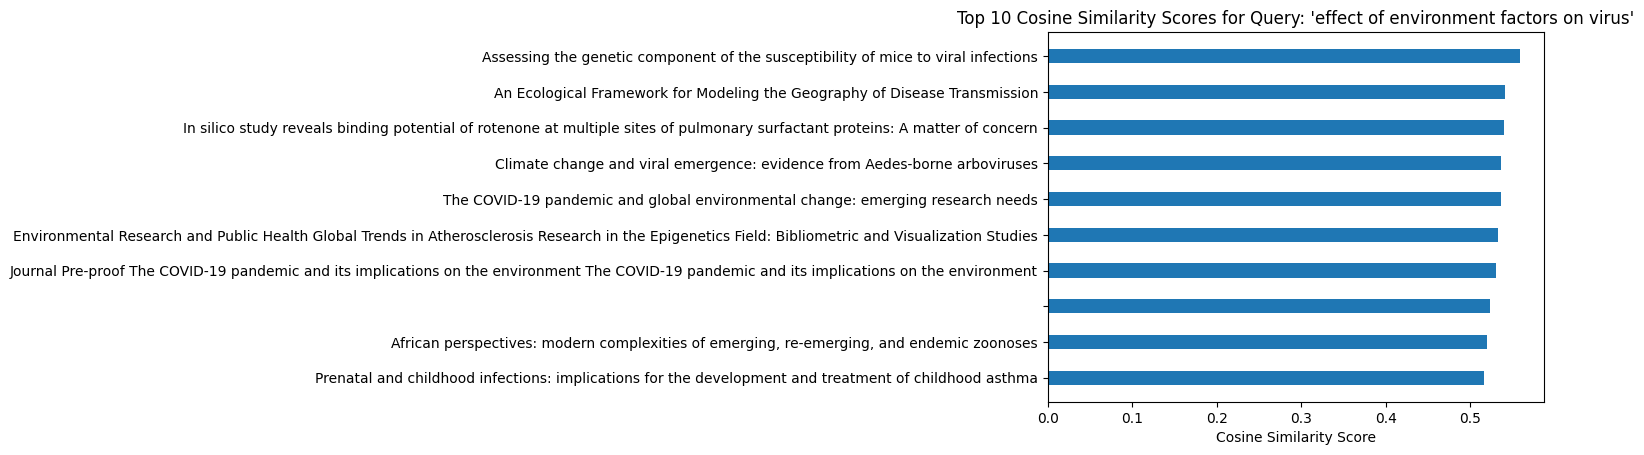

In [17]:
if __name__ == "__main__":
    # Prompt the user to enter a query string
    query = input("Please enter your query: ")
    
    # Set the number of top results to display
    top_n = 10
    
    # Call the search function to find the top results
    results = search(query, embeddings, top_n)

    # Sort the cosine similarity scores array in a descending order
    cos_scores = torch.nn.functional.cosine_similarity(model.encode(query, convert_to_tensor=True), embeddings).cpu().numpy()
    top_indices = cos_scores.argsort()[-top_n:][::-1]
    top_cos_scores =  cos_scores[top_indices]
    print(f"\nThe scores array for the top ten results: {top_cos_scores}")

    # Print the top results to the console
    print(f"\nTop {top_n} results for the query '{query}':")
    for (index, row), score in zip(results.iterrows(), top_cos_scores):
        print(f"\nScore: {score}")
        print(f"Title: {row['title']}\nBody Text: {row['text_body']}")

    # create Pandas dataframe from two lists
    df_scores = pd.DataFrame({"Titles":results['title'], "Scores":top_cos_scores})
    df_scores_sorted = df_scores.sort_values('Scores')
    df_scores_sorted = df_scores_sorted.astype({"Titles": str, "Scores": float})

    # Create a bar chart of the cosine similarity scores
    plt.barh("Titles", "Scores", data = df_scores_sorted, height = 0.4)
    plt.title(f"Top 10 Cosine Similarity Scores for Query: '{query}'")
    plt.xlabel("Cosine Similarity Score")
    plt.xticks() 
    plt.show()

**Query 5: 'persistence of virus on different inanimate surfaces'**

Please enter your query: persistence of virus on different inanimate surfaces

The scores array for the top ten results: [0.5722354  0.56521976 0.561203   0.56037664 0.5554869  0.5448694
 0.5291928  0.52711123 0.52698046 0.5246725 ]

Top 10 results for the query 'persistence of virus on different inanimate surfaces':

Score: 0.5722354054450989
Title: Ribosomal RNA depletion or exclusion has negligible effect on the detection of viruses in a pan viral microarray
Body Text: The control of viral diseases is reliant on identifying the causative agent in order to help devise and implement appropriate control measures. Virus identification is less challenging when probing known viral diseases, in particular, those with characteristic clinical signs. However, some viral diseases are not pathognomonic and therefore challenging to diagnose as is the case when unknown or new viruses are involved. Most detection assays are dependent on the availability of antibodies, antigens or sequence informat

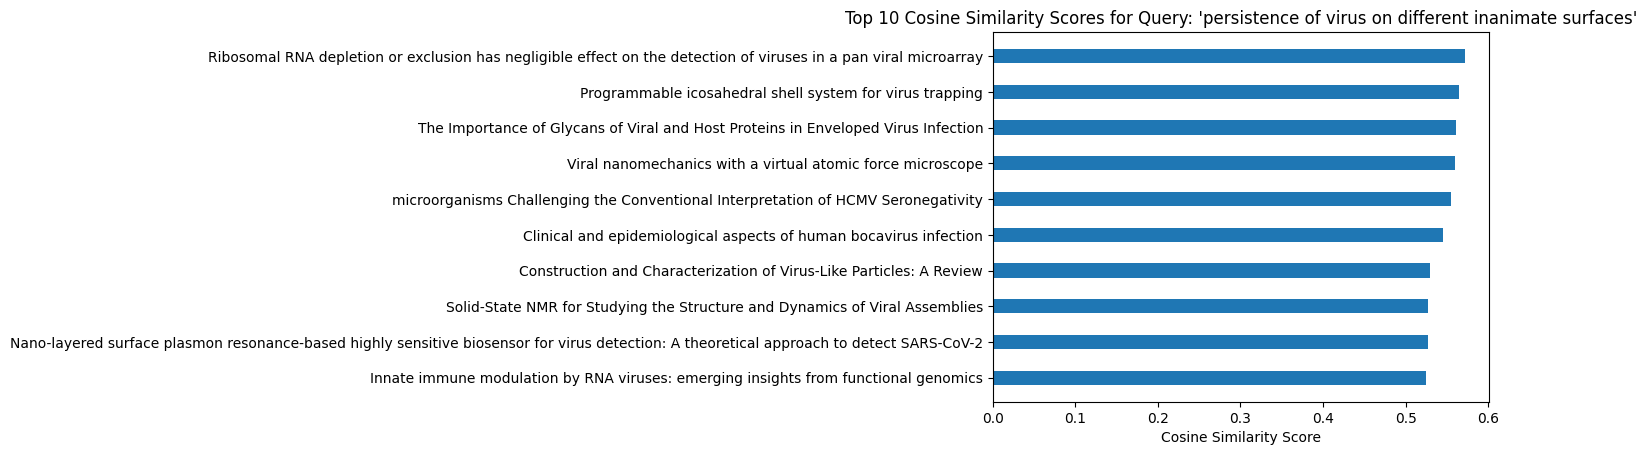

In [18]:
if __name__ == "__main__":
    # Prompt the user to enter a query string
    query = input("Please enter your query: ")
    
    # Set the number of top results to display
    top_n = 10
    
    # Call the search function to find the top results
    results = search(query, embeddings, top_n)

    # Sort the cosine similarity scores array in a descending order
    cos_scores = torch.nn.functional.cosine_similarity(model.encode(query, convert_to_tensor=True), embeddings).cpu().numpy()
    top_indices = cos_scores.argsort()[-top_n:][::-1]
    top_cos_scores =  cos_scores[top_indices]
    print(f"\nThe scores array for the top ten results: {top_cos_scores}")

    # Print the top results to the console
    print(f"\nTop {top_n} results for the query '{query}':")
    for (index, row), score in zip(results.iterrows(), top_cos_scores):
        print(f"\nScore: {score}")
        print(f"Title: {row['title']}\nBody Text: {row['text_body']}")

    # create Pandas dataframe from two lists
    df_scores = pd.DataFrame({"Titles":results['title'], "Scores":top_cos_scores})
    df_scores_sorted = df_scores.sort_values('Scores')
    df_scores_sorted = df_scores_sorted.astype({"Titles": str, "Scores": float})

    # Create a bar chart of the cosine similarity scores
    plt.barh("Titles", "Scores", data = df_scores_sorted, height = 0.4)
    plt.title(f"Top 10 Cosine Similarity Scores for Query: '{query}'")
    plt.xlabel("Cosine Similarity Score")
    plt.xticks() 
    plt.show()

# Let us repeat the same steps for the 'abstract' column instead of the 'text_body, i.e. search through the documents' abstracts and not body texts. We then will observe which embeddings yield higher similarity scores for the queries.

In [19]:
# Concatenate the title and abstract columns to form a new column called 'title_abstract'
df['title_abstract'] = df['title'] + ' ' + df['abstract']
df

<ipython-input-19-48663fd707c2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['title_abstract'] = df['title'] + ' ' + df['abstract']


,doc_id,title,abstract,text_body,language,title_body,title_abstract
0,5ac635d21fdb1726f21d7090a233dd2b5ffdc1b5,"Long Term Predictors of Breathlessness, Exerci...",J o u r n a l P r e -p r o o f 2,With over 246 million Coronavirus disease 2019...,en,"Long Term Predictors of Breathlessness, Exerci...","Long Term Predictors of Breathlessness, Exerci..."
1,71d93a6452061c57ae1532991d4a20cd6fc6fcb3,Emergence of universality in the transmission ...,The complexities involved in modelling the tra...,• Even though the pattern of disease spread is...,en,Emergence of universality in the transmission ...,Emergence of universality in the transmission ...
2,635ba7eca764f7caaa82904197c40a20111ec940,Supporting families to protect child health: P...,Supportive parenting is critical for promoting...,a1111111111 a1111111111 a1111111111 a111111111...,en,Supporting families to protect child health: P...,Supporting families to protect child health: P...
3,0282d2f9eb65318e40db21efbe6172ce16c8acf5,Perspectives on the Early Quality of Evidence ...,Background: The severe acute respiratory syndr...,The severe acute respiratory syndrome coronavi...,en,Perspectives on the Early Quality of Evidence ...,Perspectives on the Early Quality of Evidence ...
4,d96113a2d8691d3b1aee5fd1b5d30241f2b2a633,Quantify the role of superspreaders -opinion l...,Effective communication of accurate informatio...,We design a mathematical model to quantify the...,en,Quantify the role of superspreaders -opinion l...,Quantify the role of superspreaders -opinion l...
...,...,...,...,...,...,...,...
19990,1f0587d0bf239fead9cf242b73ed0a2f2b753874,"Germaphobia! Does our Relationship with, and K...",Germaphobia --a pathological aversion to micro...,Germaphobia -also known as 'mysophobia' -is th...,en,"Germaphobia! Does our Relationship with, and K...","Germaphobia! Does our Relationship with, and K..."
19991,1f71320e3751e0a4a7a4044ab35f0df95647bd34,Conservative Approach for Treatment of Isolate...,Background The ongoing COVID 19 pandemic broug...,Mandibular fractures are most often treated by...,en,Conservative Approach for Treatment of Isolate...,Conservative Approach for Treatment of Isolate...
19993,0dd0af835ffe41c88c18aefb060ac7c34e0bb6bb,Online Book Shopping in Indonesian During the ...,The COVID-19 pandemic has lead to the implemen...,The COVID-19 pandemic is still not over around...,en,Online Book Shopping in Indonesian During the ...,Online Book Shopping in Indonesian During the ...
19994,14e0640de2acb0f23458227db0d2f1a71c885a4b,Archives of Sexual Behavior Primary Health Pro...,There is a desire and need among minor-attract...,There is a growing body of research seeking to...,en,Archives of Sexual Behavior Primary Health Pro...,Archives of Sexual Behavior Primary Health Pro...


In [20]:
# Generate sentence embeddings for each full text in the DataFrame
embeddings = model.encode(df['title_abstract'].tolist(), convert_to_tensor=True)

**Query 1: 'transmission of virus in community'**

Please enter your query: transmission of virus in community

The scores array for the top ten results: [0.5893063  0.5351799  0.53329885 0.5139553  0.50337875 0.4998778
 0.49453396 0.48841622 0.4847337  0.4834643 ]

Top 10 results for the query 'transmission of virus in community':

Score: 0.5893062949180603
Title: 
Abstract: Special Section on Epidemic Diseases

Score: 0.5351799130439758
Title: Modeling and analysis of epidemic spreading on community networks with heterogeneity
Abstract: h i g h l i g h t s
 • A modified community network model with heterogeneity among communities is proposed.
 • A mathematical epidemic model for each community is presented based on this network.
 • Study the effect of the location of initial infection node on epidemic spreading. • Study the impact of the heterogeneity among communities on epidemic spreading. a b s t r a c t A large number of real world networks exhibit community structure, and different communities may often possess heterogeneity. In

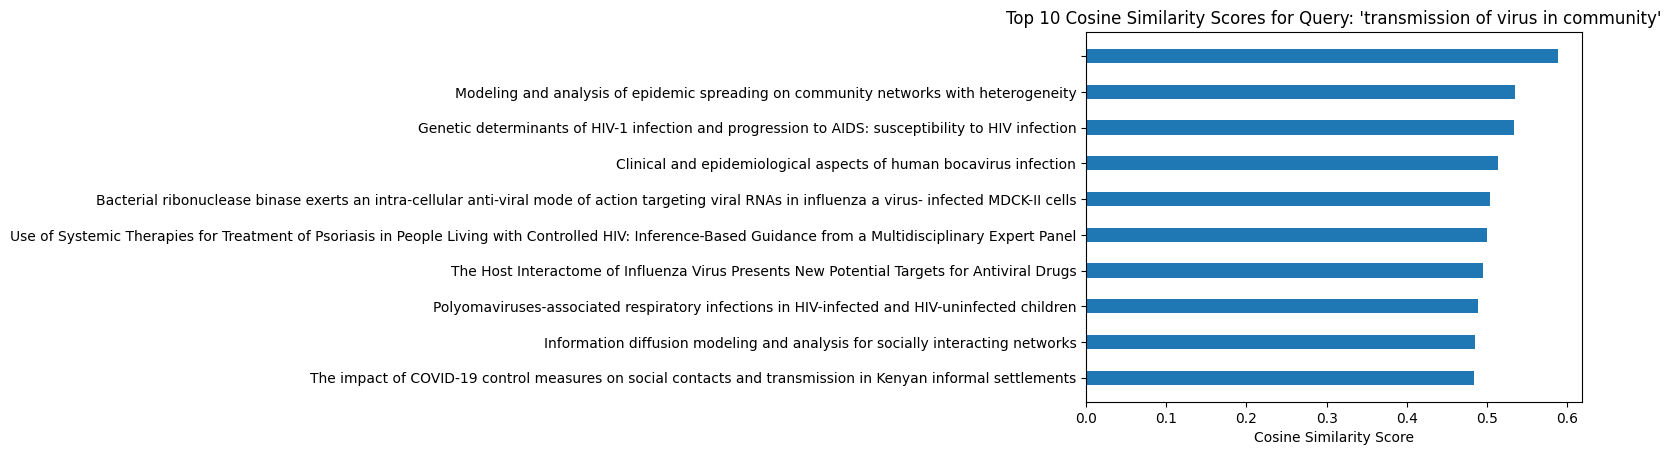

In [21]:
if __name__ == "__main__":
    # Prompt the user to enter a query string
    query = input("Please enter your query: ")
    
    # Set the number of top results to display
    top_n = 10
    
    # Call the search function to find the top results
    results = search(query, embeddings, top_n)

    # Sort the cosine similarity scores array in a descending order
    cos_scores = torch.nn.functional.cosine_similarity(model.encode(query, convert_to_tensor=True), embeddings).cpu().numpy()
    top_indices = cos_scores.argsort()[-top_n:][::-1]
    top_cos_scores =  cos_scores[top_indices]
    print(f"\nThe scores array for the top ten results: {top_cos_scores}")

    # Print the top results to the console
    print(f"\nTop {top_n} results for the query '{query}':")
    for (index, row), score in zip(results.iterrows(), top_cos_scores):
        print(f"\nScore: {score}")
        print(f"Title: {row['title']}\nAbstract: {row['abstract']}")

    # create Pandas dataframe from two lists
    df_scores = pd.DataFrame({"Titles":results['title'], "Scores":top_cos_scores})
    df_scores_sorted = df_scores.sort_values('Scores')

    # Create a bar chart of the cosine similarity scores
    plt.barh("Titles", "Scores", data = df_scores_sorted, height = 0.4)
    plt.title(f"Top 10 Cosine Similarity Scores for Query: '{query}'")
    plt.xlabel("Cosine Similarity Score")
    plt.xticks() 
    plt.show()

**Query 2: 'range of incubation period'**

Please enter your query: range of incubation period

The scores array for the top ten results: [0.36016735 0.35575888 0.3547374  0.35406965 0.3445174  0.33828855
 0.33509752 0.33366048 0.32900146 0.32874364]

Top 10 results for the query 'range of incubation period':

Score: 0.36016735434532166
Title: 
Abstract: Offi ce,

Score: 0.3557588756084442
Title: Journal Pre-proofs Living With In-Mask Micro-Climate Title: Living With In-Mask Micro-Climate
Abstract: The in-mask micro-climate is heat and moisture buildup under facemasks but facemask doffing can immediately neutralize in-mask elevations in temperature and relative humidity. Therefore, home/workplace/facility living with in-mask micro-climate during COVID-19 pandemic warrants safe provisions for intermittent facemask "vacation".

Score: 0.35473740100860596
Title: C L I N I C A L I M A G E Air, Air Everywhere!
Abstract: When using a gum elastic bougie, a common device to aid difficult intubations, one must appreciate the significant

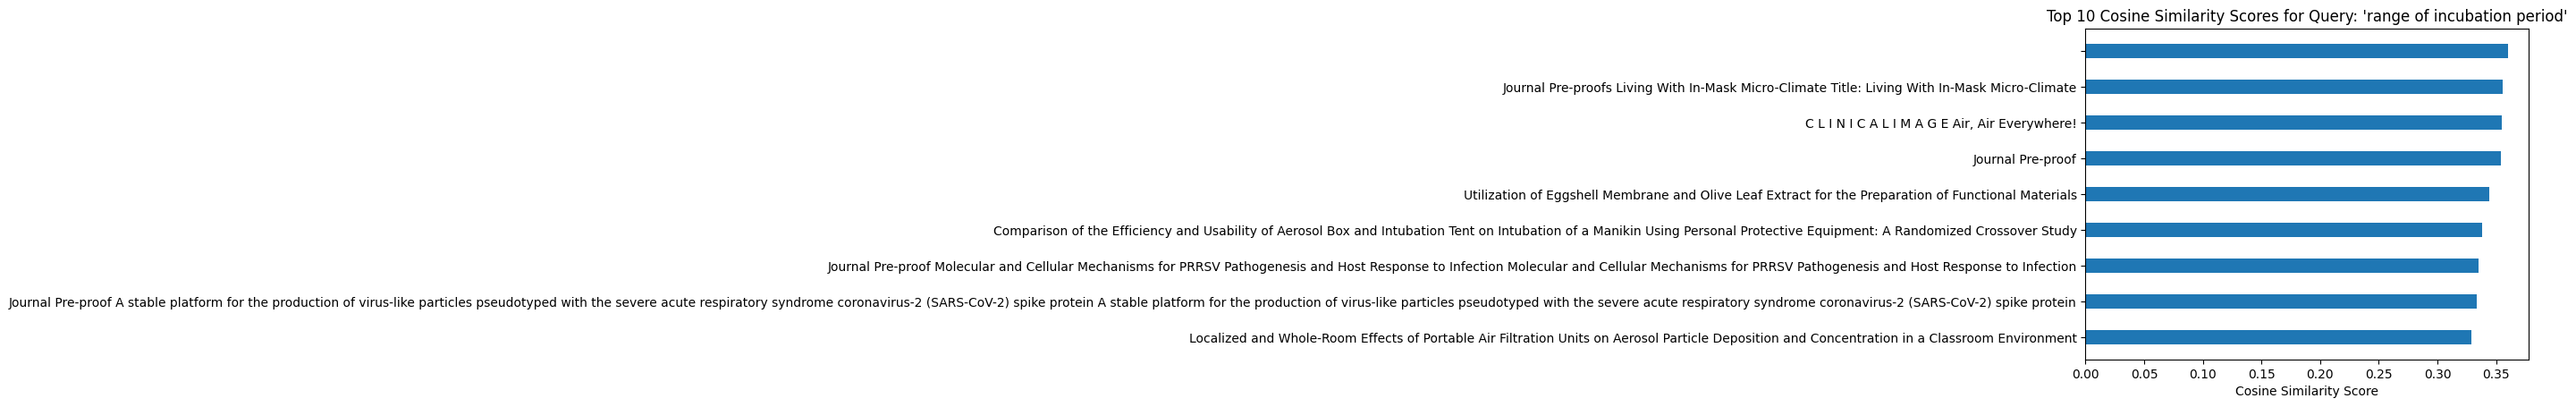

In [22]:
if __name__ == "__main__":
    # Prompt the user to enter a query string
    query = input("Please enter your query: ")
    
    # Set the number of top results to display
    top_n = 10
    
    # Call the search function to find the top results
    results = search(query, embeddings, top_n)

    # Sort the cosine similarity scores array in a descending order
    cos_scores = torch.nn.functional.cosine_similarity(model.encode(query, convert_to_tensor=True), embeddings).cpu().numpy()
    top_indices = cos_scores.argsort()[-top_n:][::-1]
    top_cos_scores =  cos_scores[top_indices]
    print(f"\nThe scores array for the top ten results: {top_cos_scores}")

    # Print the top results to the console
    print(f"\nTop {top_n} results for the query '{query}':")
    for (index, row), score in zip(results.iterrows(), top_cos_scores):
        print(f"\nScore: {score}")
        print(f"Title: {row['title']}\nAbstract: {row['abstract']}")

    # create Pandas dataframe from two lists
    df_scores = pd.DataFrame({"Titles":results['title'], "Scores":top_cos_scores})
    df_scores_sorted = df_scores.sort_values('Scores')
    print(df_scores_sorted)
    df_scores_sorted = df_scores_sorted.drop(18717)
    print(df_scores_sorted)

    # Create a bar chart of the cosine similarity scores
    plt.barh("Titles", "Scores", data = df_scores_sorted, height = 0.4)
    plt.title(f"Top 10 Cosine Similarity Scores for Query: '{query}'")
    plt.xlabel("Cosine Similarity Score")
    plt.xticks() 
    plt.show()

**Query 3: 'seasonal outbreaks'**

Please enter your query: seasonal outbreaks

The scores array for the top ten results: [0.4116989  0.40070224 0.37500584 0.37478247 0.3722087  0.36814556
 0.36325508 0.34515458 0.3425411  0.34244955]

Top 10 results for the query 'seasonal outbreaks':

Score: 0.4116989076137543
Title: The Record-breaking Meiyu in 2020 and Associated Atmospheric Circulation and Tropical SST Anomalies
Abstract: The record-breaking meiyu in the Yangtze-Huaihe River valley (YHRV) in 2020 was characterized by an early onset, a delayed retreat, a long duration, a wide meridional rainbelt, abundant precipitation, and frequent heavy rainstorm processes. It is noted that the East Asian monsoon circulation system presented a significant quasi-biweekly oscillation (QBWO) during the meiyu season of 2020 that was associated with the onset and retreat of meiyu, a northward shift and stagnation of the rainbelt, and the occurrence and persistence of heavy rainstorm processes. Correspondingly, during the meiyu season, 

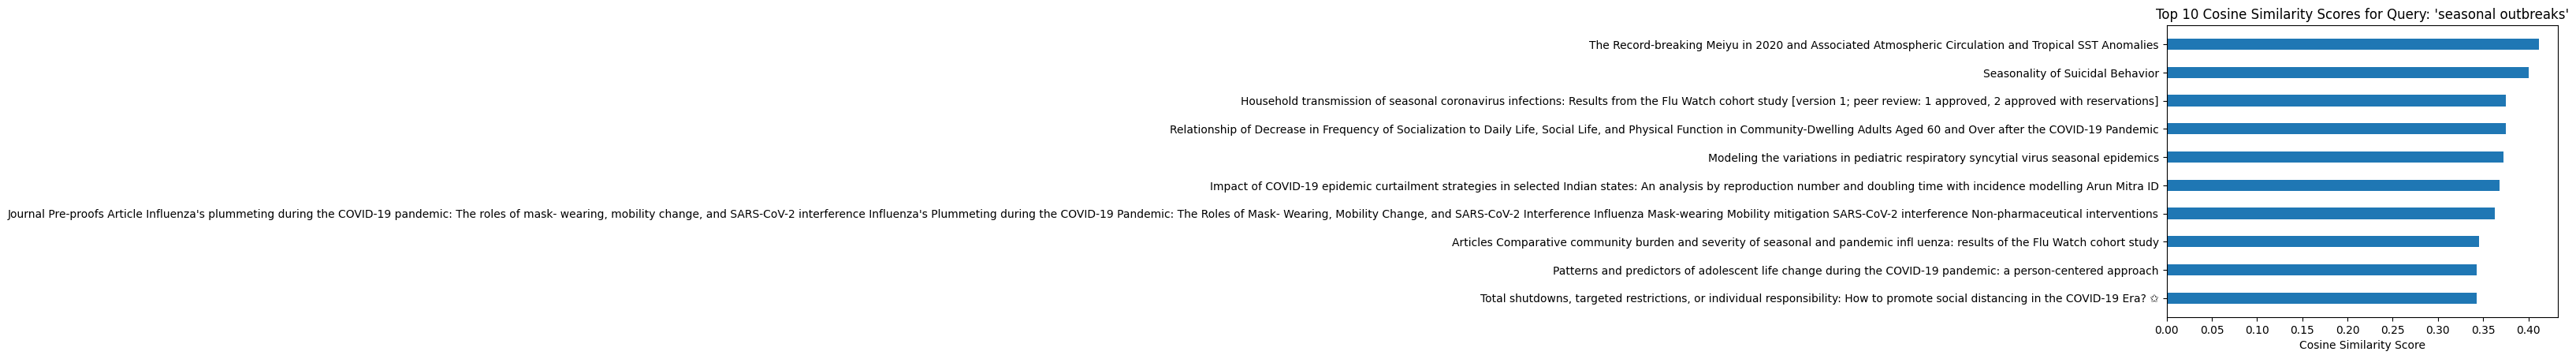

In [23]:
if __name__ == "__main__":
    # Prompt the user to enter a query string
    query = input("Please enter your query: ")
    
    # Set the number of top results to display
    top_n = 10
    
    # Call the search function to find the top results
    results = search(query, embeddings, top_n)

    # Sort the cosine similarity scores array in a descending order
    cos_scores = torch.nn.functional.cosine_similarity(model.encode(query, convert_to_tensor=True), embeddings).cpu().numpy()
    top_indices = cos_scores.argsort()[-top_n:][::-1]
    top_cos_scores =  cos_scores[top_indices]
    print(f"\nThe scores array for the top ten results: {top_cos_scores}")

    # Print the top results to the console
    print(f"\nTop {top_n} results for the query '{query}':")
    for (index, row), score in zip(results.iterrows(), top_cos_scores):
        print(f"\nScore: {score}")
        print(f"Title: {row['title']}\nAbstract: {row['abstract']}")

    # create Pandas dataframe from two lists
    df_scores = pd.DataFrame({"Titles":results['title'], "Scores":top_cos_scores})
    df_scores_sorted = df_scores.sort_values('Scores')
    df_scores_sorted = df_scores_sorted.astype({"Titles": str, "Scores": float})

    # Create a bar chart of the cosine similarity scores
    plt.barh("Titles", "Scores", data = df_scores_sorted, height = 0.4)
    plt.title(f"Top 10 Cosine Similarity Scores for Query: '{query}'")
    plt.xlabel("Cosine Similarity Score")
    plt.xticks() 
    plt.show()

**Query 4: 'effect of environment factors on virus'**

Please enter your query: effect of environment factors on virus

The scores array for the top ten results: [0.5622715  0.5351419  0.5306941  0.52932084 0.5242647  0.52382934
 0.5236742  0.5227977  0.52141833 0.520291  ]

Top 10 results for the query 'effect of environment factors on virus':

Score: 0.5622714757919312
Title: Climate change and viral emergence: evidence from Aedes-borne arboviruses
Abstract: Climate change is leading to increases in global temperatures and erratic precipitation patterns, both of which are contributing to the expansion of mosquito-borne arboviruses and the populations of the mosquitos that vector them. Herein, we review recent evidence of emergence and expansion of arboviruses transmitted by Aedes mosquitos that has been driven in part by environmental changes. We present as a case study of recent work from Có rdoba, Argentina, where dengue has been actively emerging in the past decade. We review recent empirical and modeling studies that aim to understan

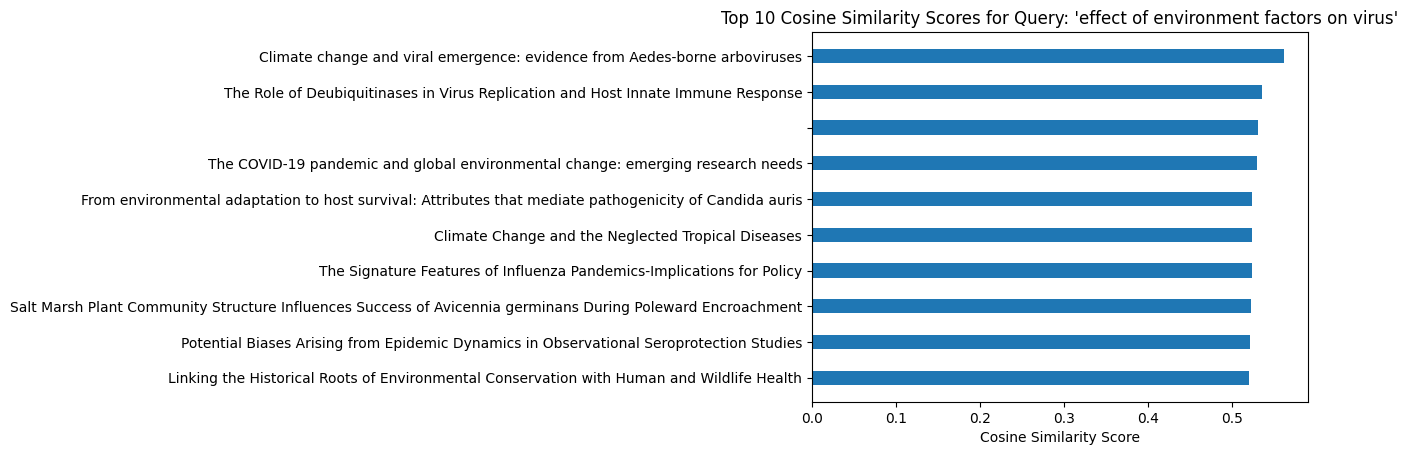

In [24]:
if __name__ == "__main__":
    # Prompt the user to enter a query string
    query = input("Please enter your query: ")
    
    # Set the number of top results to display
    top_n = 10
    
    # Call the search function to find the top results
    results = search(query, embeddings, top_n)

    # Sort the cosine similarity scores array in a descending order
    cos_scores = torch.nn.functional.cosine_similarity(model.encode(query, convert_to_tensor=True), embeddings).cpu().numpy()
    top_indices = cos_scores.argsort()[-top_n:][::-1]
    top_cos_scores =  cos_scores[top_indices]
    print(f"\nThe scores array for the top ten results: {top_cos_scores}")

    # Print the top results to the console
    print(f"\nTop {top_n} results for the query '{query}':")
    for (index, row), score in zip(results.iterrows(), top_cos_scores):
        print(f"\nScore: {score}")
        print(f"Title: {row['title']}\nAbstract: {row['abstract']}")

    # create Pandas dataframe from two lists
    df_scores = pd.DataFrame({"Titles":results['title'], "Scores":top_cos_scores})
    df_scores_sorted = df_scores.sort_values('Scores')
    df_scores_sorted = df_scores_sorted.astype({"Titles": str, "Scores": float})

    # Create a bar chart of the cosine similarity scores
    plt.barh("Titles", "Scores", data = df_scores_sorted, height = 0.4)
    plt.title(f"Top 10 Cosine Similarity Scores for Query: '{query}'")
    plt.xlabel("Cosine Similarity Score")
    plt.xticks() 
    plt.show()

**Query 5: 'persistence of virus on different inanimate surfaces'**

Please enter your query: persistence of virus on different inanimate surfaces

The scores array for the top ten results: [0.59498155 0.55979013 0.55695534 0.5463405  0.5376633  0.53340065
 0.5280795  0.5278493  0.52693045 0.51800406]

Top 10 results for the query 'persistence of virus on different inanimate surfaces':

Score: 0.5949815511703491
Title: Journal Pre-proof Surface Chemistry Can Unlock Drivers of Surface Stability of SARS-CoV-2 in Variety of Environmental Conditions Surface Chemistry Can Unlock Drivers of Surface Stability of SARS-CoV-2 in Variety of Environmental Conditions
Abstract: The surface stability and resulting transmission of the SARS-CoV-2, specifically in indoor environments, have been identified as a potential pandemic challenge requiring investigation. This novel virus can be found on various surfaces in contaminated sites such as clinical places, however, the behaviour and molecular interactions of the virus with respect to the surfaces are poorly understood.

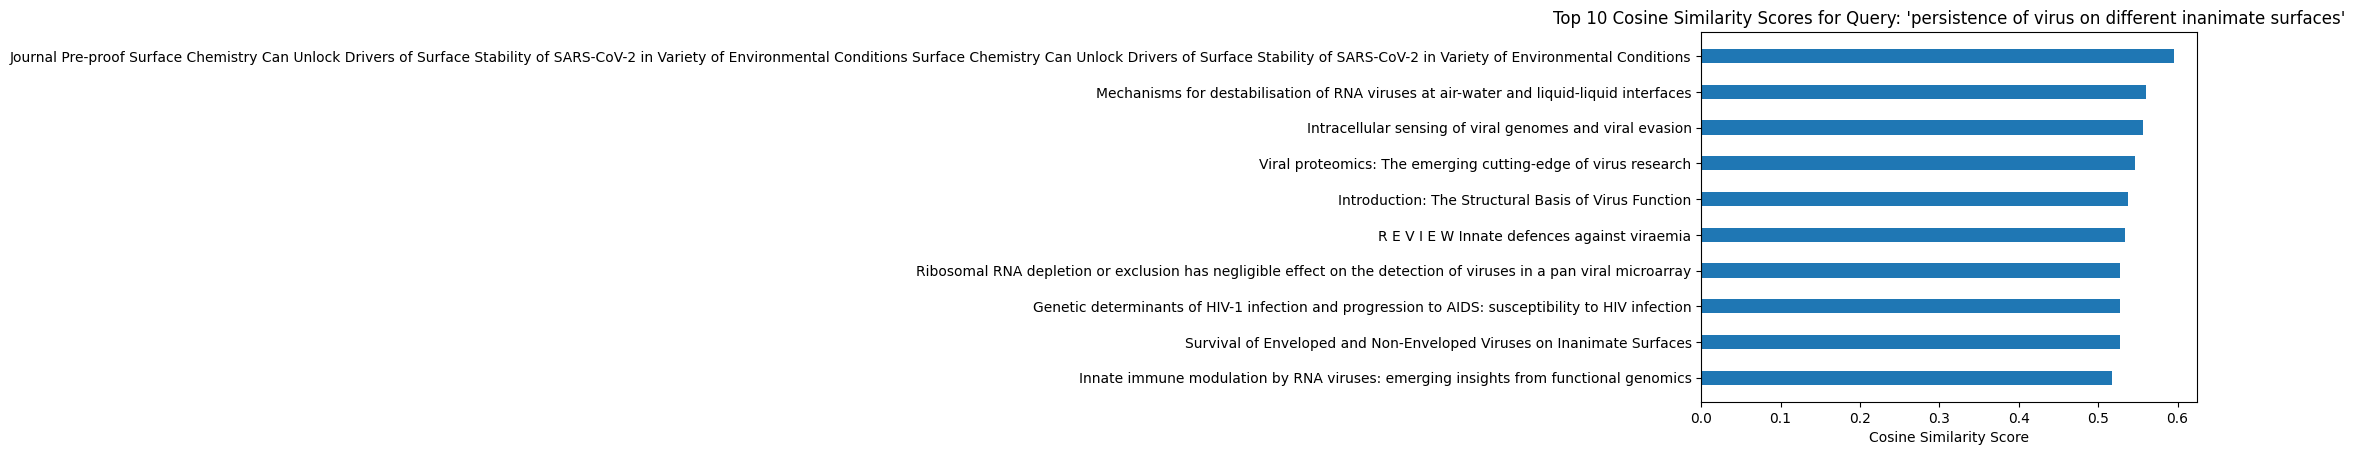

In [25]:
if __name__ == "__main__":
    # Prompt the user to enter a query string
    query = input("Please enter your query: ")
    
    # Set the number of top results to display
    top_n = 10
    
    # Call the search function to find the top results
    results = search(query, embeddings, top_n)

    # Sort the cosine similarity scores array in a descending order
    cos_scores = torch.nn.functional.cosine_similarity(model.encode(query, convert_to_tensor=True), embeddings).cpu().numpy()
    top_indices = cos_scores.argsort()[-top_n:][::-1]
    top_cos_scores =  cos_scores[top_indices]
    print(f"\nThe scores array for the top ten results: {top_cos_scores}")

    # Print the top results to the console
    print(f"\nTop {top_n} results for the query '{query}':")
    for (index, row), score in zip(results.iterrows(), top_cos_scores):
        print(f"\nScore: {score}")
        print(f"Title: {row['title']}\nAbstract: {row['abstract']}")

    # create Pandas dataframe from two lists
    df_scores = pd.DataFrame({"Titles":results['title'], "Scores":top_cos_scores})
    df_scores_sorted = df_scores.sort_values('Scores')
    df_scores_sorted = df_scores_sorted.astype({"Titles": str, "Scores": float})

    # Create a bar chart of the cosine similarity scores
    plt.barh("Titles", "Scores", data = df_scores_sorted, height = 0.4)
    plt.title(f"Top 10 Cosine Similarity Scores for Query: '{query}'")
    plt.xlabel("Cosine Similarity Score")
    plt.xticks() 
    plt.show()